# Checking spin up of CCLM soil temperature 

In [11]:
import valenspy as vp
from valenspy.preprocessing_tasks.regrid import remap_cdo
from valenspy.preprocessing_tasks.select import select_point

from valenspy.diagnostic_visualizations import *
import matplotlib.pyplot as plt
import warnings
import xarray as xr
import numpy as np


# Turn off all warnings
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (select.py, line 1)

### 0. Settings

In [12]:
# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'

# directory with experiments

experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
# , "EUR11_1993_NU_TT_EC_TSO"
experiment = experiments[0]

# do selection of individual points (do this in separate notebook.)
# Define the coordinates
d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'channel'   : (-1.05, 50.14)
}
point_id = 'opwijk'
point_coord = d_point_coords[point_id]


# start up input manager
manager = vp.InputManager(machine=machine)


In [81]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def compare_soil_spinup_experiments(experiments, year_to_analyse, months_to_analyse):
    variable = 'tsl'
    if len(experiments) < 2:
        print("Not enough experiments to compare")
        return
    nb_combinations = factorial(len(experiments)-1)
    print(nb_combinations)
    fig, axes = plt.subplots(nb_combinations+1,1,figsize = (7,8))
    plt.subplots_adjust(hspace=0.7)
    print(axes)
    axes=axes.flatten()
    print(axes)
    diff_list = []
    nb_plot = 0
    
    for exp1 in experiments:
        print(exp1)
        ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[exp1, "daymean"])
        ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
        # Select the data for the specific year and months
        da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
        da_mod_point_exp1 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
        for exp2 in experiments:
            if exp1 != exp2:
                print(exp2)
                ax = axes[nb_plot]
                ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[exp2, "daymean"])
                ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
                da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
                da_mod_point_exp2 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
                diff = da_mod_point_exp1 - da_mod_point_exp2
                combination1 = exp1 + "  -  " + exp2
                combination2 = exp2 + '-' + exp1
                if combination1 not in diff_list and combination2 not in diff_list:
                    diff_list.append(exp1 + "-" + exp2)
                    print(nb_plot)
                    for soil_level in da_mod_point_exp1.soil1: 
                        diff.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
                        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

                        ax.set_title(' ', loc='center')
                        #ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
                        ax.set_title(combination1, loc='left')
                    ax.grid(visible = True)
                    nb_plot = nb_plot + 1
    

    # return diff_list

        


## 1. Loading and plotting

### 1.1 soil temperature

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

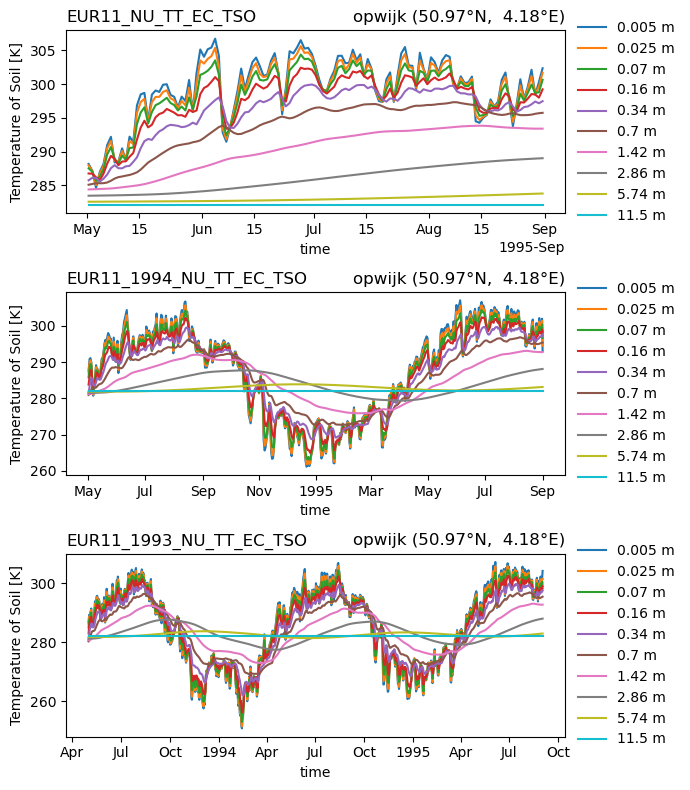

In [13]:
#experiments = ['BE28_Nick', 'BE28_Ruben', 'BE28_Nukleus']
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO


File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables ar

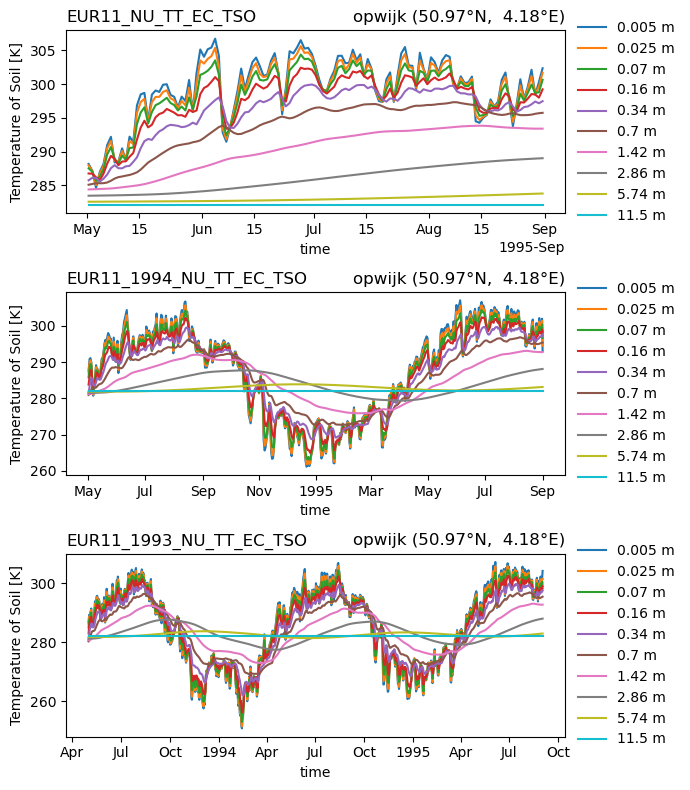

In [14]:
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% 

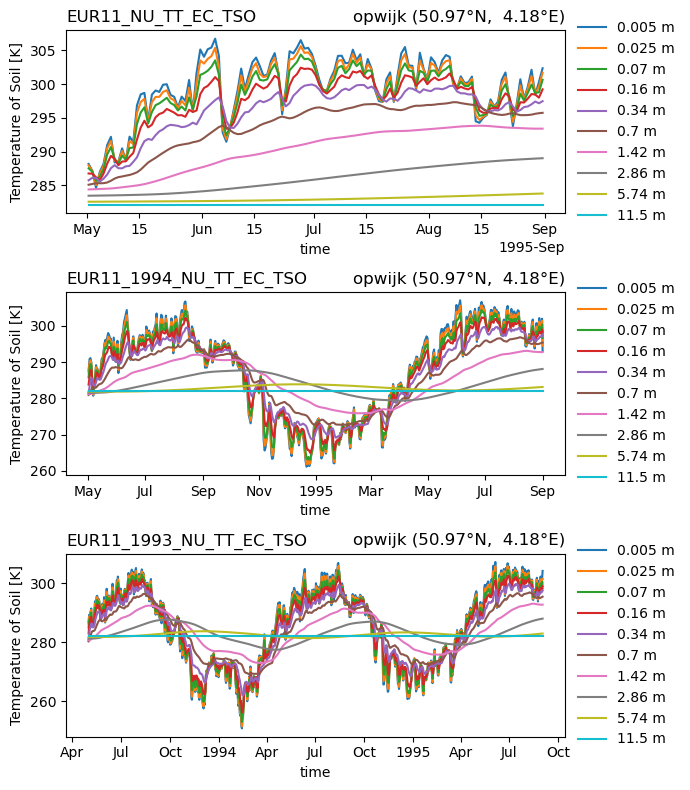

In [15]:
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

EUR11_NU_TT_EC_TSO


File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables ar

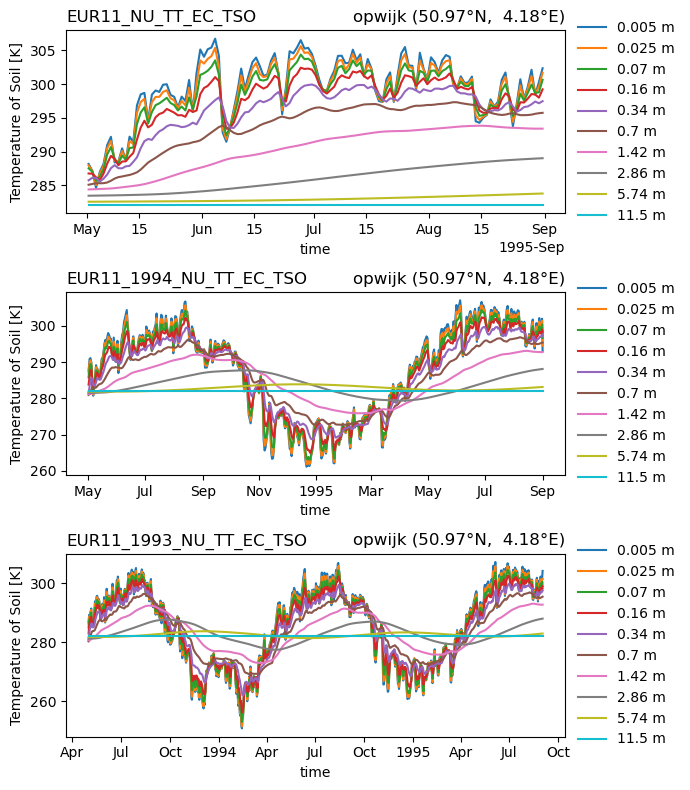

In [16]:
#experiments = ['BE28_Nick', 'BE28_Ruben']
variable = 'tsl'

fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
    print(experiment)
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')

fig.tight_layout()

In [17]:
da_mod_point

<xarray.DataArray 'tsl' (time: 854, soil1: 10)> Size: 34kB
dask.array<getitem, shape=(854, 10), dtype=float32, chunksize=(348, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 7kB 1993-05-01T11:30:00 ... 1995-09-01T05:...
    lon      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lat      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    rlon     float32 4B 19.36
    rlat     float32 4B 1.045
  * soil1    (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 1.42 2.86 5.74 11.5
Attributes:
    standard_name:       soil_temperature
    long_name:           Temperature of Soil
    units:               K
    grid_mapping:        rotated_pole
    cell_methods:        time: point
    original_name:       T_SO
    original_long_name:  soil temperature
    original_units:      K
    freq:                daily
    path_identifiers:    ['EUR11_1993_NU_TT_EC_TSO', 'daymean']
    dataset:             CCLM

EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


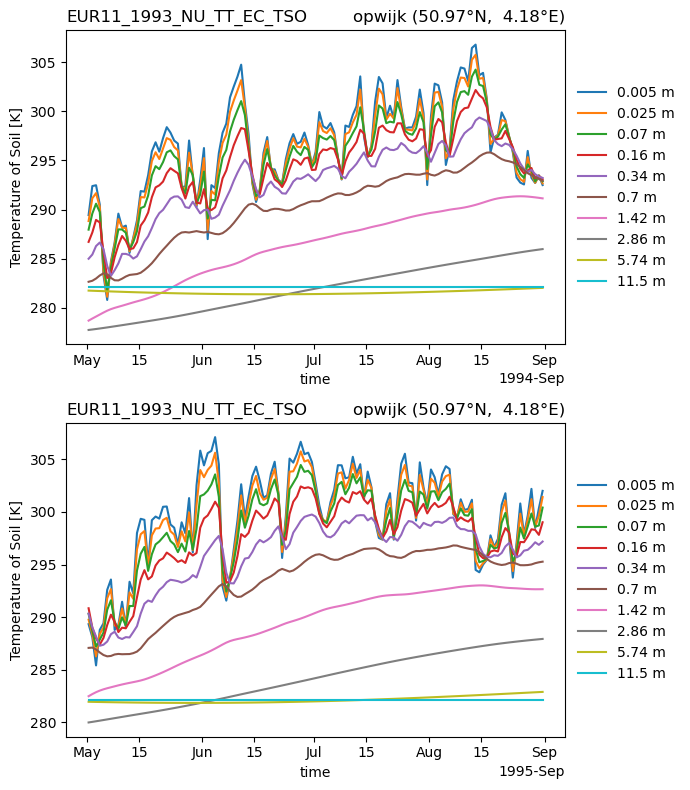

In [18]:
variable = 'tsl'

fig, axes = plt.subplots(2,1,figsize = (7,8))
axes=axes.flatten()

experiment = experiments[-1]

print(experiment)


ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
months_to_analyse = [5, 6, 7, 8]
year_to_analyse = 1994

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))

ax = axes[0]

for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')

year_to_analyse = 1995

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
ax = axes[1]

for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')
fig.tight_layout()



In [19]:
diff[-1].values

NameError: name 'diff' is not defined

EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


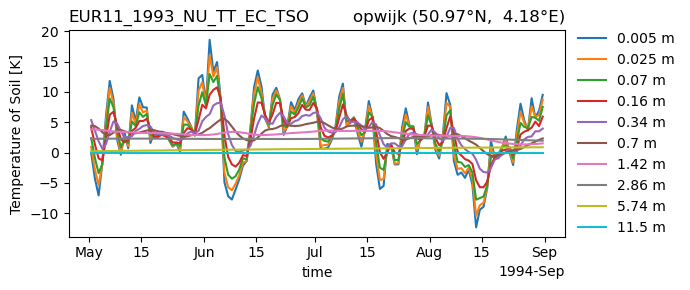

In [20]:
variable = 'tsl'

fig, ax = plt.subplots(1,1,figsize = (7,3))

experiment = experiments[-1]

print(experiment)


ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)
months_to_analyse = [5, 6, 7, 8]
year_to_analyse = 1994

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point_1994 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
year_to_analyse = 1995

da_mod_point = ds_mod_point[variable].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))
da_mod_point_1995 = da_mod_point.sel(time=da_mod_point['time'].dt.year.isin(year_to_analyse))
da_mod_point_1995['time'] = da_mod_point_1994.time
diff = da_mod_point_1995 - da_mod_point_1994

for soil_level in da_mod_point.soil1: 

    diff.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(experiment, loc='left')


fig.tight_layout()



2
[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]
EUR11_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
EUR11_1994_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tsl']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
0
EUR11_1993_NU_TT_EC_TSO
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1993_NU_TT_EC_TSO/T_SO/daily/T_SO_daymean.nc
Variable metadata is missi

IndexError: index 3 is out of bounds for axis 0 with size 3

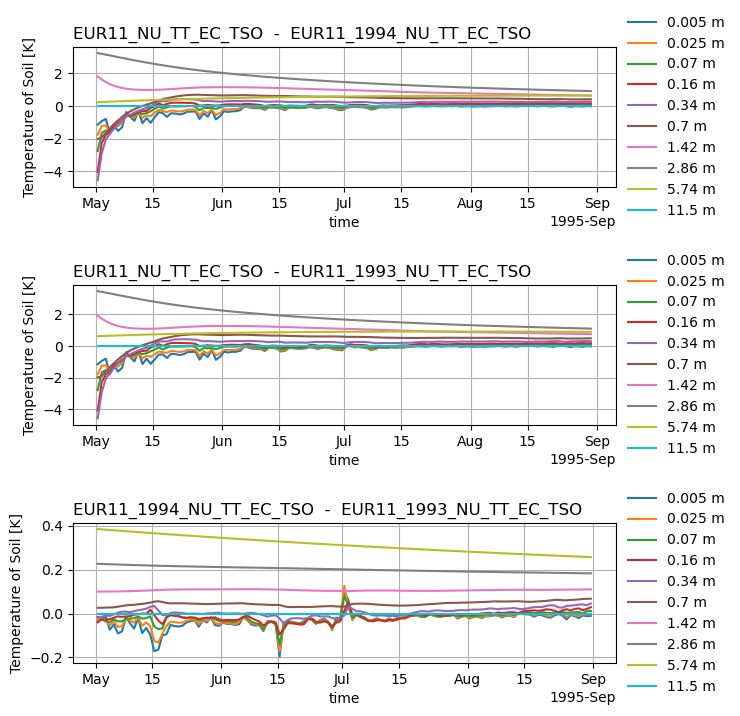

In [83]:
#experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
experiments = ["EUR11_NU_TT_EC_TSO", "EUR11_1994_NU_TT_EC_TSO", "EUR11_1993_NU_TT_EC_TSO"]
year_to_analyse = 1995
months_to_analyse = [5, 6,7,8]
compare_soil_spinup_experiments(experiments, year_to_analyse, months_to_analyse)

### 1.1 soil moisture

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


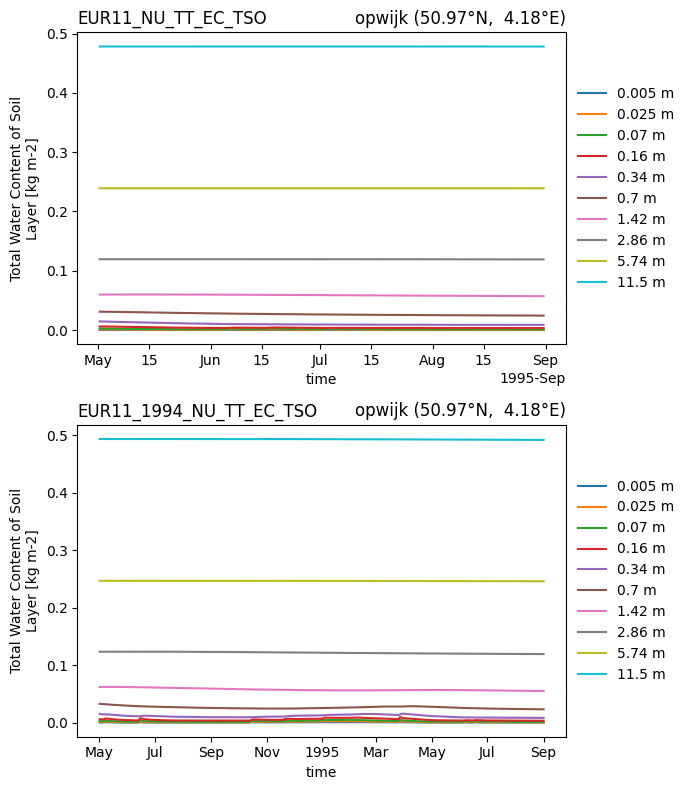

In [ ]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]

    for soil_level in da_mod_point.soil1: 

        da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        

fig.tight_layout()

### relative soil moisture (not the same as volumetric - for this the bulk density of CCLM is necessary!!)

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']
File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_1994_NU_TT_EC_TSO/W_SO/daily/W_SO_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
25.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['mrsol']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole', 'soil1_bnds']


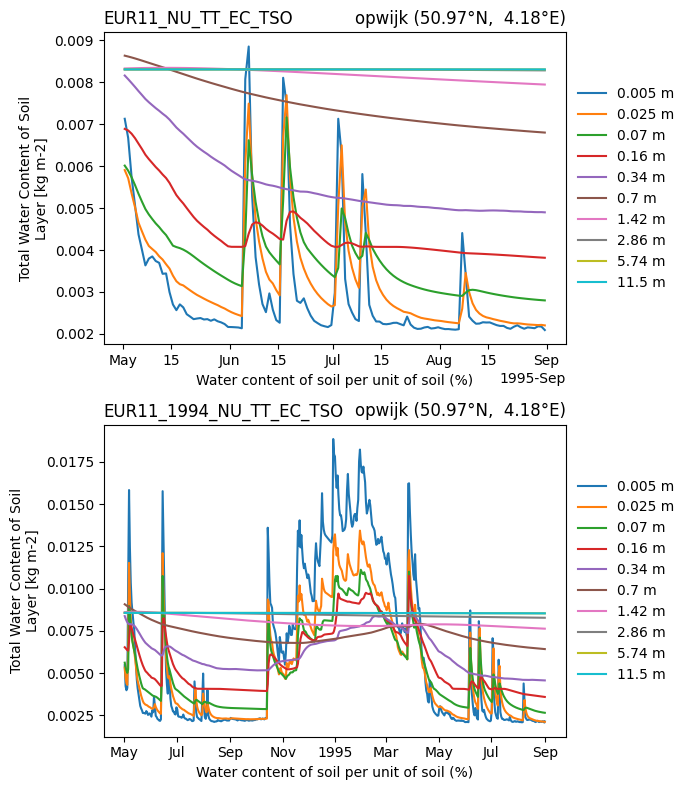

In [ ]:
variable = 'mrsol'


fig, axes = plt.subplots(len(experiments),1,figsize = (7,8))
axes=axes.flatten()

for i,experiment in enumerate(experiments): 
        
    ax = axes[i]
    ds_mod = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "daymean"])

    ds_mod_point = select_point(ds_mod, point_coord, rotated_pole = True)

    da_mod_point = ds_mod_point[variable]
    soil_depth = np.insert(ds_mod_point.soil1.values,0,0)*1000 # in mm 
    soil_thickness = np.diff(soil_depth)
    da_mod_point_rel = da_mod_point / soil_thickness * 100
    
    for soil_level in da_mod_point.soil1: 

        da_mod_point_rel.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
        ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

        ax.set_title(' ', loc='center')
        ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
        ax.set_title(experiment, loc='left')
        ax.set_xlabel('Water content of soil per unit of soil (%)')

fig.tight_layout()